In [68]:
import desimodel.focalplane
import desitarget.io
import fitsio
import numpy as np
import desimodel.io
import desimodel.footprint
import matplotlib.pyplot as plt
import glob
import os.path
%matplotlib inline

In [75]:
fiberassign_root = "/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults"
fiberassign_tilefiles = glob.glob(fiberassign_root+"/tile*.fits")
print(len(fiberassign_tilefiles))

10667


In [57]:
sweep_root = "/project/projectdirs/cosmo/data/legacysurvey/dr5/sweep/5.0/"
sweep_files = desitarget.io.list_sweepfiles(sweep_root)
print(len(sweep_files))

303


In [67]:
output_root = "/global/cscratch1/sd/forero/gfa_test/"
print(output_root)

/global/cscratch1/sd/forero/gfa_test


In [58]:
sweep_data = []
for i in range(10):
    sweep_file = sweep_files[i]
    sweep_data.append(fitsio.read(sweep_file, columns=['RA', 'DEC', 'FLUX_R']))

In [59]:
len(sweep_data)

10

17269341


(15, 20)

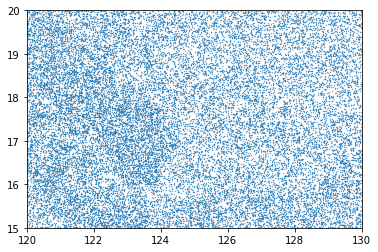

In [60]:
all_sweep = np.concatenate(sweep_data, axis=0)
print(len(all_sweep))
r = np.random.random(len(all_sweep))
ii = r<0.01
plt.scatter(all_sweep['RA'][ii], all_sweep['DEC'][ii], s=0.1)
plt.xlim([120,130])
plt.ylim([15,20])

In [62]:
#plt.scatter(all_sweep['RA'][:100], all_sweep['DEC'][:100])
desi_tiles = desimodel.io.load_tiles()
gfa_tiles = np.array([ 5904,  6585 , 6606,  9552, 11050, 11051, 11070, 11071])

16071


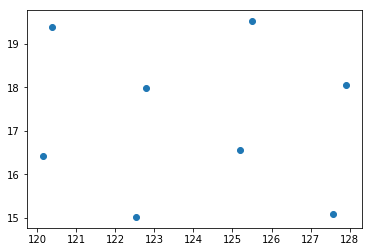

In [63]:
print(len(desi_tiles))
ii = np.in1d(desi_tiles['TILEID'], gfa_tiles)
plt.scatter(desi_tiles['RA'][ii], desi_tiles['DEC'][ii])


In [64]:
all_targetindices = dict()
for tile_id in gfa_tiles:
    ii = desi_tiles['TILEID'] == tile_id
    print(tile_id, desi_tiles['RA'][ii], desi_tiles['DEC'][ii])
    targetindices, gfaindices = desimodel.focalplane.on_tile_gfa(tile_id, all_sweep)
    all_targetindices[tile_id] = targetindices
    print(tile_id, len(targetindices))

5904 [ 122.8] [ 17.99]
5904 13467
6585 [ 120.37] [ 19.39]
6585 4336
6606 [ 120.14] [ 16.41]
6606 5660
9552 [ 122.54] [ 15.01]
9552 6330
11050 [ 125.2] [ 16.55]
11050 11622
11051 [ 127.56] [ 15.09]
11051 6041
11070 [ 127.91] [ 18.06]
11070 9299
11071 [ 125.51] [ 19.53]
11071 5898


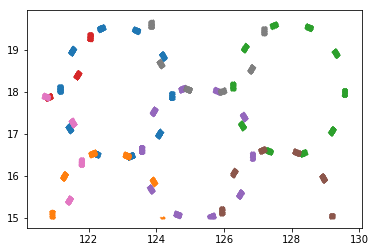

In [77]:
for k in all_targetindices.keys():
    tt = all_targetindices[k]
    plt.scatter(all_sweep['RA'][tt], all_sweep['DEC'][tt], s=0.1)

In [69]:
for k in all_targetindices.keys():
    tt = all_targetindices[k]
    filename = os.path.join(output_root, "gfa_targets_tile_{:05d}.fits".format(k))
    print(filename)
    a = fitsio.write(filename, all_sweep[tt])
#a = Table.read("GFA_targets.fits")

/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_05904.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_09552.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_11070.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_06585.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_11050.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_11051.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_06606.fits
/global/cscratch1/sd/forero/gfa_test/gfa_targets_tile_11071.fits


In [76]:
tilefiles = []
for k in all_targetindices.keys():
    print(k)
    for f in fiberassign_tilefiles:
        string_id = '{:05d}'.format(k)
        if string_id in f:
            tilefiles.append(f)
print(len(tilefiles))
print(tilefiles)

5904
9552
11070
6585
11050
11051
6606
11071
8
['/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_05904.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_09552.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_11070.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_06585.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_11050.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_11051.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_06606.fits', '/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_11071.fits']


In [ ]:
fitsio.write()